In [72]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20, 8)

def drawEnvironmentThick(addsize=1):
    whiteblankimage = 255 * np.ones(shape=[300, 800, 3], dtype=np.uint8)
    rect = cv2.rectangle(whiteblankimage, pt1=(0,0), pt2=(800,300), color=(255,255,255), thickness=addsize)
    wall1 = cv2.rectangle(rect, (0, 0), (25, 300),(0,225,255), (addsize))
    wall1 = cv2.rectangle(rect, (0, 0), (800, 25),(225,100,255), (addsize))
    wall1 = cv2.rectangle(rect, (775, 0), (800, 775),(169,140,225), (addsize))
    wall1 = cv2.rectangle(rect, (0, 275), (800, 300),(100,225,200), (addsize))
    
    wall1 = cv2.rectangle(rect, (175, 0), (225, 200),(0,0,255), (addsize))
    wall1 = cv2.rectangle(wall1, (75, 175), (325, 225), (100,100,100), (addsize))
    wall1 = cv2.rectangle(wall1, (375, 300), (425, 75), color=(255,0,0), thickness=addsize)
    wall1 = cv2.rectangle(wall1, (575, 0), (625, 200), color=(60,100,85), thickness=addsize)
    wall1 = cv2.rectangle(wall1, (475, 175), (725, 225), color=(160,190,0), thickness=addsize)
    return wall1

def drawEnvironment(addsize=1):
    whiteblankimage = 255 * np.ones(shape=[300, 800, 3], dtype=np.uint8)
    rect = cv2.rectangle(whiteblankimage, pt1=(0,0), pt2=(800,300), color=(255,255,255), thickness=addsize)
    wall1 = cv2.rectangle(rect, (200, 0), (200, 200),(0,0,255), (addsize))
    wall1 = cv2.rectangle(wall1, (100, 200), (300, 200), (100,100,100), (addsize))
    wall1 = cv2.rectangle(wall1, (400, 300), (400, 100), color=(255,0,0), thickness=addsize)
    wall1 = cv2.rectangle(wall1, (600, 0), (600, 200), color=(60,100,85), thickness=addsize)
    wall1 = cv2.rectangle(wall1, (500, 200), (700, 200), color=(160,190,0), thickness=addsize)
    return wall1

def plotenv(image):   
    fig, ax = plt.subplots()
    x_ticks = np.arange(0, 801, 25)
    y_ticks = np.arange(0, 301, 25)
    plt.gca().invert_yaxis()
    ax.set_xticks(x_ticks)
    ax.set_yticks(y_ticks)    
    ax.xaxis.tick_top()
    plt.imshow(image)
    plt.show()
    
    
def rotate_robot(vertex, angle):
    vertex = np.array(vertex)
    theta = np.deg2rad(angle)
    R = np.array([[np.cos(theta), -np.sin(theta)],
                [np.sin(theta), np.cos(theta)]])
    vertices = np.matmul(R, vertex.T).T
    return vertices

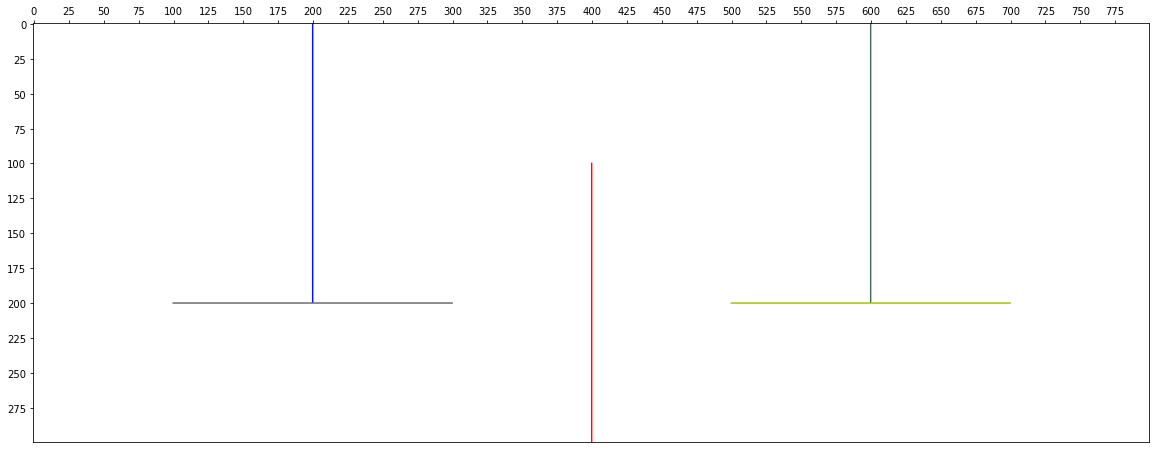

In [67]:
robotenv = drawEnvironment()
plotenv(robotenv)

# Configuration space when the robot angle is 0 degrees

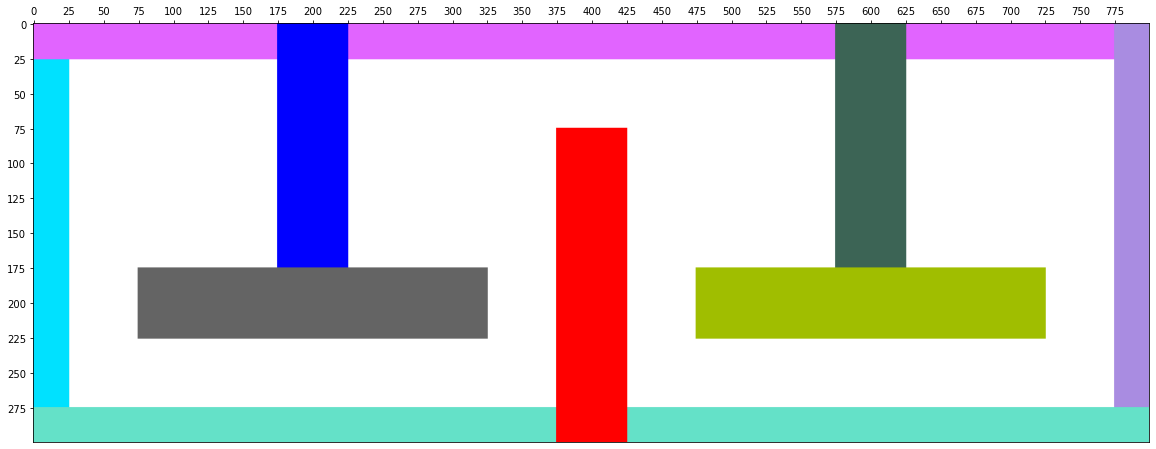

In [68]:
# Consider the size of the robot and extend the walls to the size of the robot
robotenv = drawEnvironmentThick(addsize=-1)
plotenv(robotenv)

# Configuration space for 45 degrees

In [87]:
pt1 = (75,175)
pt2 = (325, 225)
point1 = rotate_robot(pt1, 45)
point2 = rotate_robot(pt1, 45)

In [83]:
point1[0]

-70.71067811865474

In [70]:
def draw_angled_rec(x0, y0, width, height, angle, img):

    _angle = angle * math.pi / 180.0
    b = math.cos(_angle) * 0.5
    a = math.sin(_angle) * 0.5
    pt0 = (int(x0 - a * height - b * width),
           int(y0 + b * height - a * width))
    pt1 = (int(x0 + a * height - b * width),
           int(y0 - b * height - a * width))
    pt2 = (int(2 * x0 - pt0[0]), int(2 * y0 - pt0[1]))
    pt3 = (int(2 * x0 - pt1[0]), int(2 * y0 - pt1[1]))

    cv2.line(img, pt0, pt1, (255, 255, 255), 3)
    cv2.line(img, pt1, pt2, (255, 255, 255), 3)
    cv2.line(img, pt2, pt3, (255, 255, 255), 3)
    cv2.line(img, pt3, pt0, (255, 255, 255), 3)

In [ ]:
draw_angled_rec(x0, y0, width, height, angle, img)